In [ ]:
#https://huggingface.co/ByteDance/SDXL-Lightning

In [ ]:
!pip install diffusers

In [ ]:
import torch
import diffusers
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file

In [ ]:
base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_unet.safetensors" # Use the correct ckpt for your step setting!


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# or force CPU explicitly:
device = torch.device("cpu")


In [ ]:
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")


/usr/local/lib/python3.11/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

sdxl_lightning_4step_unet.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")


In [ ]:
pipe("dancing peacock in green garden", num_inference_steps=4, guidance_scale=0).images[0].save("output.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Used to change filepaths
from pathlib import Path
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
from PIL import Image
%matplotlib inline
import os
print(os.listdir("./"))

['.config', 'output.png', 'sample_data']


In [ ]:
IPython.display.Image(filename='output.png')

In [ ]:
pipe("Shravan Adapa Image", num_inference_steps=4, guidance_scale=0).images[0].save("output1.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
IPython.display.Image(filename='output1.png')

In [ ]:
pipe("pandas playing in the tree", num_inference_steps=4, guidance_scale=0).images[0].save("output2.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
IPython.display.Image(filename='output2.png')

In [ ]:
pipe("crow with her child birds on the tree with nests", num_inference_steps=4, guidance_scale=0).images[0].save("output3.png")

  0%|          | 0/4 [00:00<?, ?it/s]

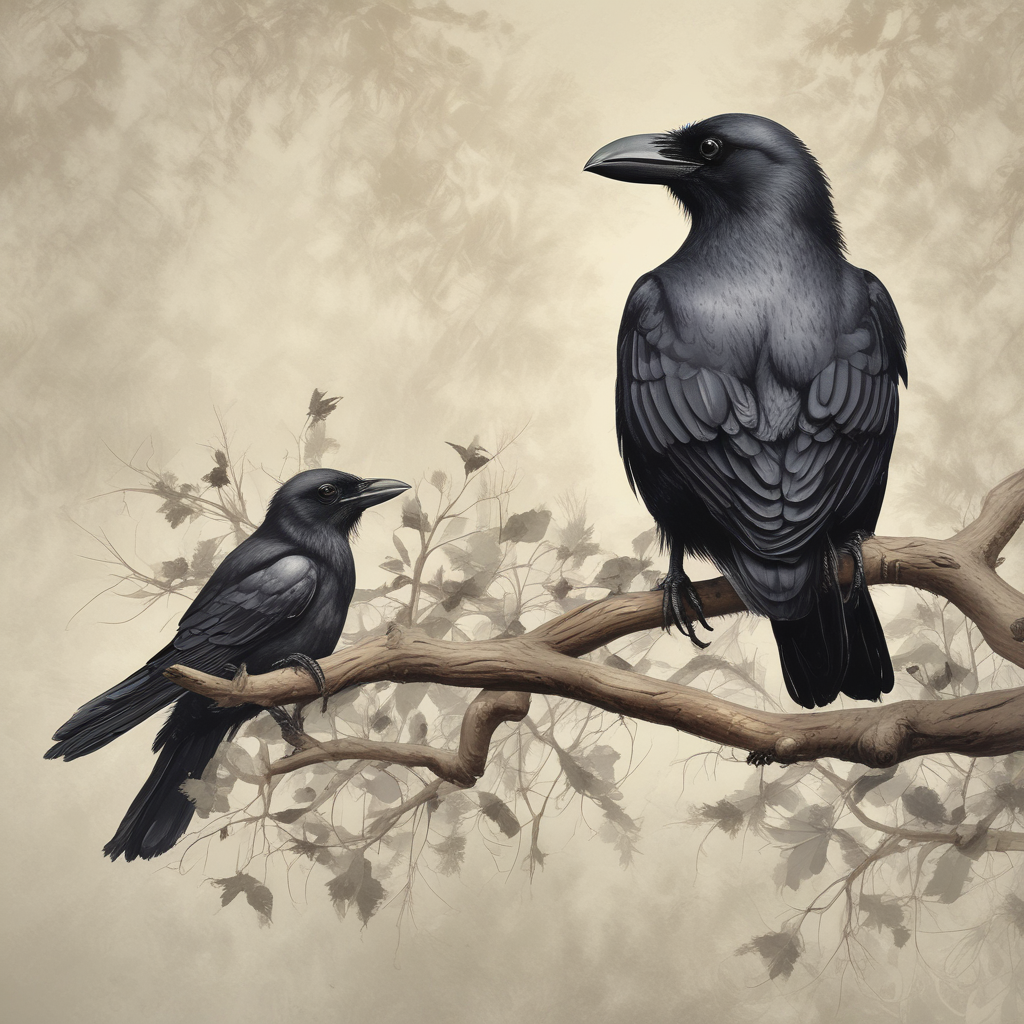

In [ ]:
IPython.display.Image(filename='output3.png')

In [ ]:
pipe("sunrise at the hill station", num_inference_steps=4, guidance_scale=0).images[0].save("output4.png")

  0%|          | 0/4 [00:00<?, ?it/s]

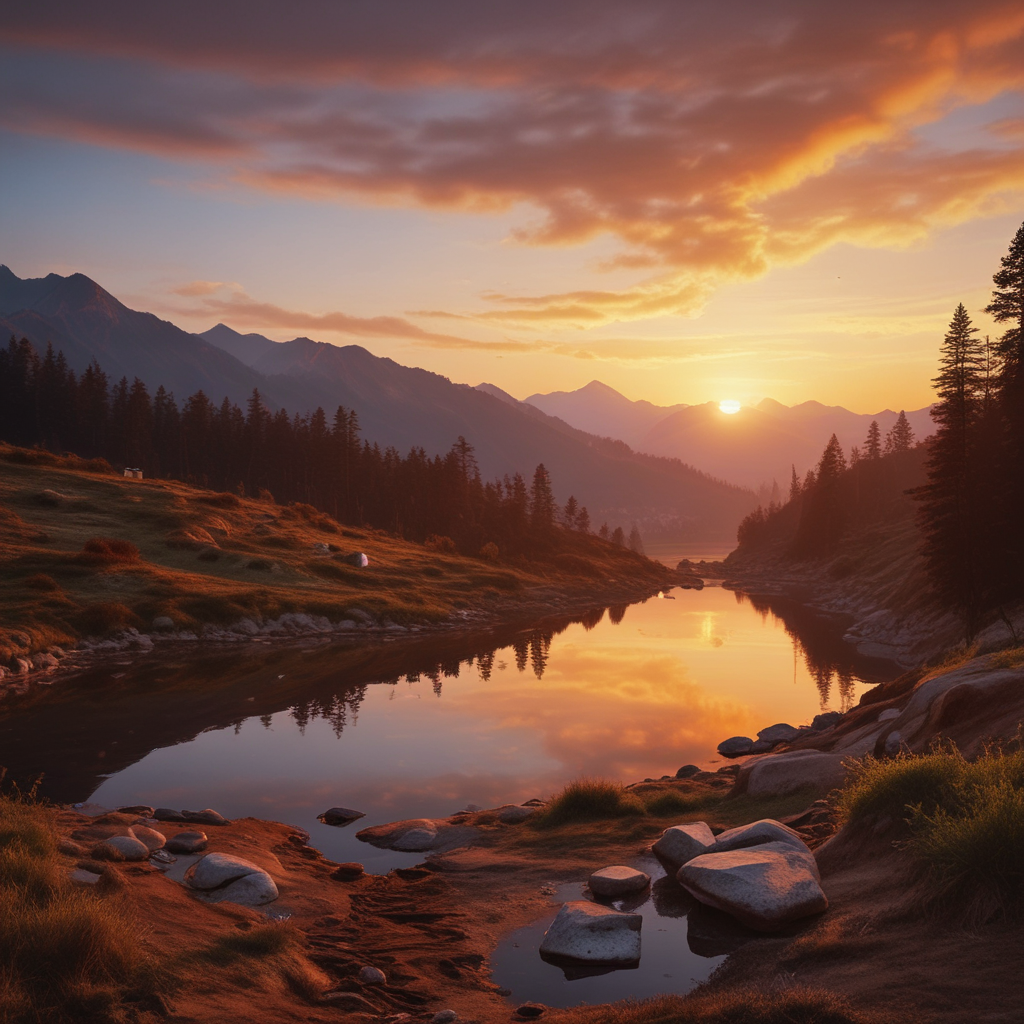

In [ ]:
IPython.display.Image(filename='output4.png')

In [ ]:
pipe("Busy roads of Hyderabad", num_inference_steps=4, guidance_scale=0).images[0].save("output5.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
IPython.display.Image(filename='output5.png')

In [ ]:
pipe("Red Fort", num_inference_steps=4, guidance_scale=0).images[0].save("output6.png")

  0%|          | 0/4 [00:00<?, ?it/s]

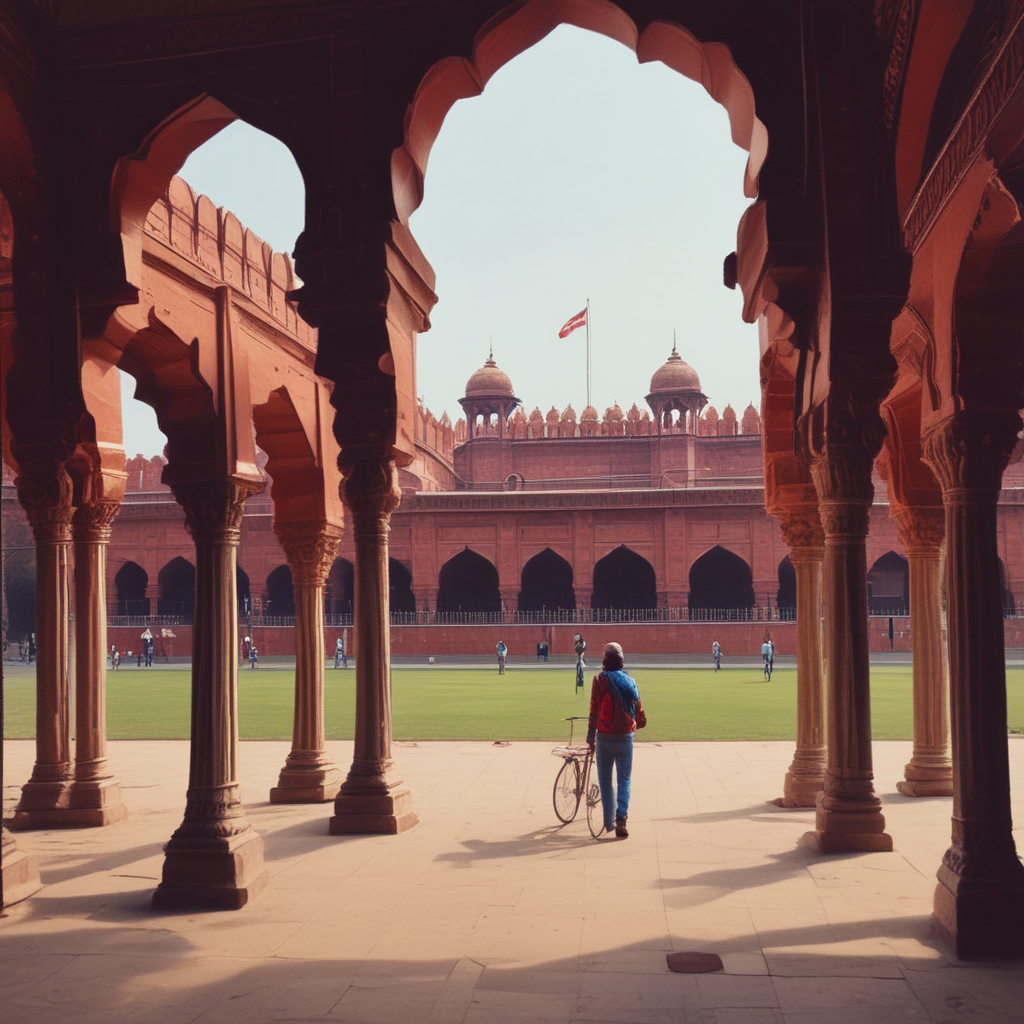

In [ ]:
IPython.display.Image(filename='output6.png')

In [ ]:
pipe("Adiyogi Lord Shiva Image", num_inference_steps=4, guidance_scale=0).images[0].save("output7.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
IPython.display.Image(filename='output7.png')

In [ ]:
pipe("Hyderabad City Nights", num_inference_steps=4, guidance_scale=0).images[0].save("output8.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
IPython.display.Image(filename='output8.png')

In [ ]:
pipe("Beautiful Moon with the stars", num_inference_steps=4, guidance_scale=0).images[0].save("output9.png")

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
IPython.display.Image(filename='output9.png')